<a href="https://colab.research.google.com/github/bobyuwono/-bobyuwono-.github.io/blob/master/DOJO_CPU_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2.7.0


In [2]:
!wget --no-check-certificate \
   https://storage.googleapis.com/dojo-vault-123/cpu-full-a.csv \
    -O /tmp/cpu.csv

--2022-02-10 00:00:51--  https://storage.googleapis.com/dojo-vault-123/cpu-full-a.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.251.111.128, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12017 (12K) [text/csv]
Saving to: ‘/tmp/cpu.csv’

/tmp/cpu.csv        100%[===================>]  11.74K  --.-KB/s    in 0s      

2022-02-10 00:00:52 (56.5 MB/s) - ‘/tmp/cpu.csv’ saved [12017/12017]



In [3]:
def plot_series(time, series, format="-", start=0, end=None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("value")
  plt.grid(True)

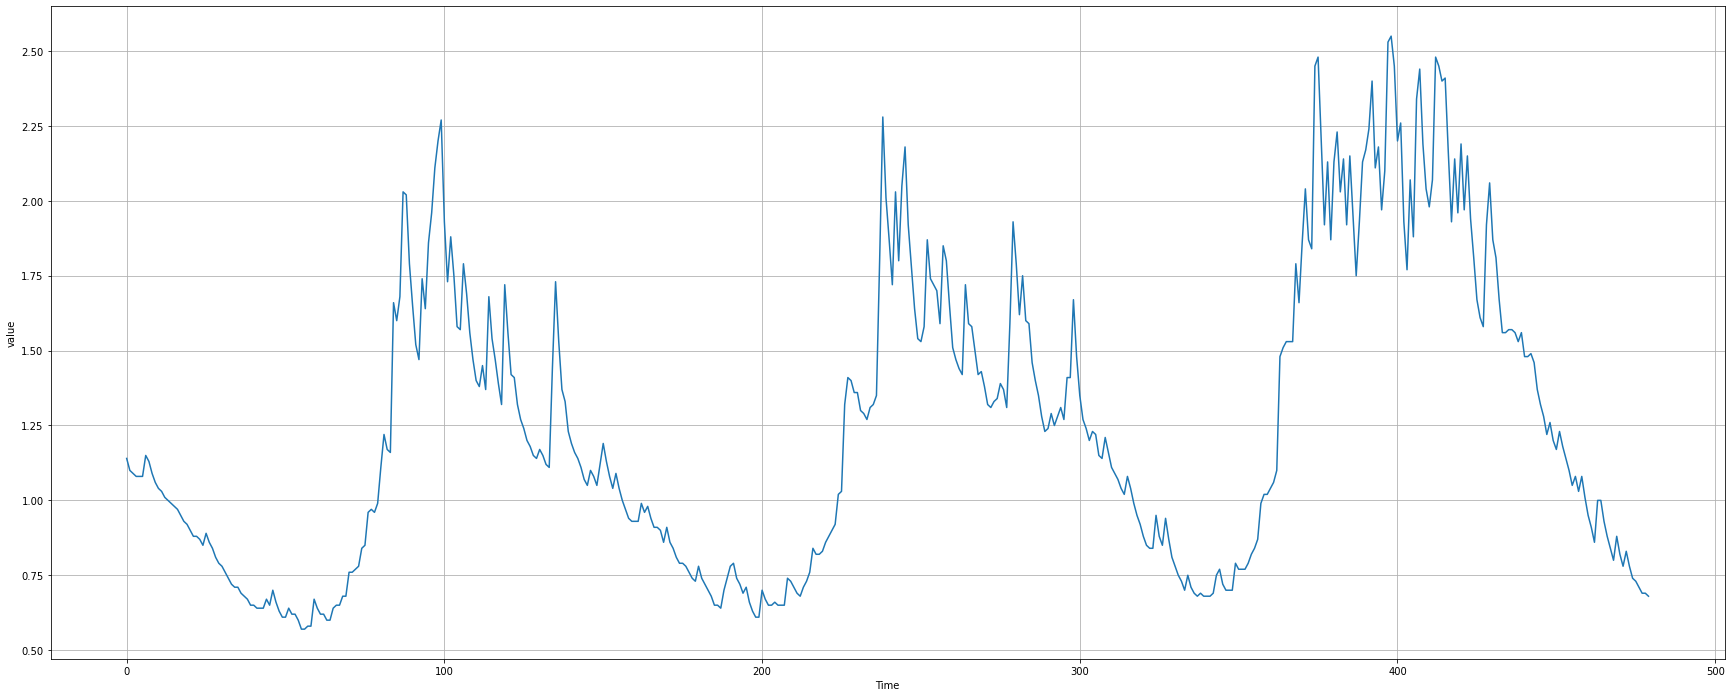

In [4]:
import csv
time_step = []
cpu_usage = []

with open('/tmp/cpu.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  time_indicator=0
  for row in reader:
    cpu_usage.append(float(row[1]))
    # time = row[0].split()[1]
    time_step.append(time_indicator)
    time_indicator +=1

series = np.array(cpu_usage)
time = np.array(time_step)
plt.figure(figsize=(30,12))
plot_series(time,series)

In [6]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM



# reshape to [10, 1]
n_features = 1
series = series.reshape((len(series), n_features))

# define generator
n_input = 10
generator = TimeseriesGenerator(series, series, length=n_input, batch_size=8)

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit_generator(generator, steps_per_epoch=1, epochs=500, verbose=0)

# make a one step prediction out of sample
x_input = series[-10:].reshape((1, n_input, n_features))

yhat = model.predict(x_input, verbose=0)
print(yhat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


[[0.80573225]]


In [7]:
x_input = series[-10:].reshape((1, n_input, n_features))

yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.80573225]]


In [18]:
series_duplicate = series

In [19]:
type(series_duplicate)

numpy.ndarray

In [57]:
def forecast_future( series,model, forecast_length, n_input, n_features):
  """
  1. looping i dari 1-forecast_length:
   - predict value series[-n_input:]
   - append
   - predict lagi
  """ 
  for i in range(0, forecast_length):
    x_input = series[-n_input:].reshape((1, n_input, n_features))
    y_out = model.predict(x_input, verbose=0)
    print('hasil predict ke {} adalah {}'.format(i, y_out))
    series = np.append(series,y_out)
  return series
 

# Forecasting

In [62]:
forecast_length = 20 #seberapa panjang value yang ingin di-forecast? 
n_input = 10 #lebar window
n_features =  1 #lebar label

result = forecast_future(series, model, forecast_length, n_input, n_features)

hasil predict ke 0 adalah [[0.80573225]]
hasil predict ke 1 adalah [[0.8082141]]
hasil predict ke 2 adalah [[0.8129149]]
hasil predict ke 3 adalah [[0.81588095]]
hasil predict ke 4 adalah [[0.8219305]]
hasil predict ke 5 adalah [[0.83034915]]
hasil predict ke 6 adalah [[0.83964616]]
hasil predict ke 7 adalah [[0.85045093]]
hasil predict ke 8 adalah [[0.8629769]]
hasil predict ke 9 adalah [[0.8758545]]
hasil predict ke 10 adalah [[0.88942116]]
hasil predict ke 11 adalah [[0.8970662]]
hasil predict ke 12 adalah [[0.9049769]]
hasil predict ke 13 adalah [[0.91304255]]
hasil predict ke 14 adalah [[0.9213246]]
hasil predict ke 15 adalah [[0.92965996]]
hasil predict ke 16 adalah [[0.93791974]]
hasil predict ke 17 adalah [[0.9460489]]
hasil predict ke 18 adalah [[0.9539533]]
hasil predict ke 19 adalah [[0.96151906]]


In [63]:
#check apakah berhasil forecast?
# input yang diharapkan adalah:
# dimensi[0] = series.length + forecast.length
# dalam percobaan ini, dimensi[0] = 480+20 

result.shape

(500,)

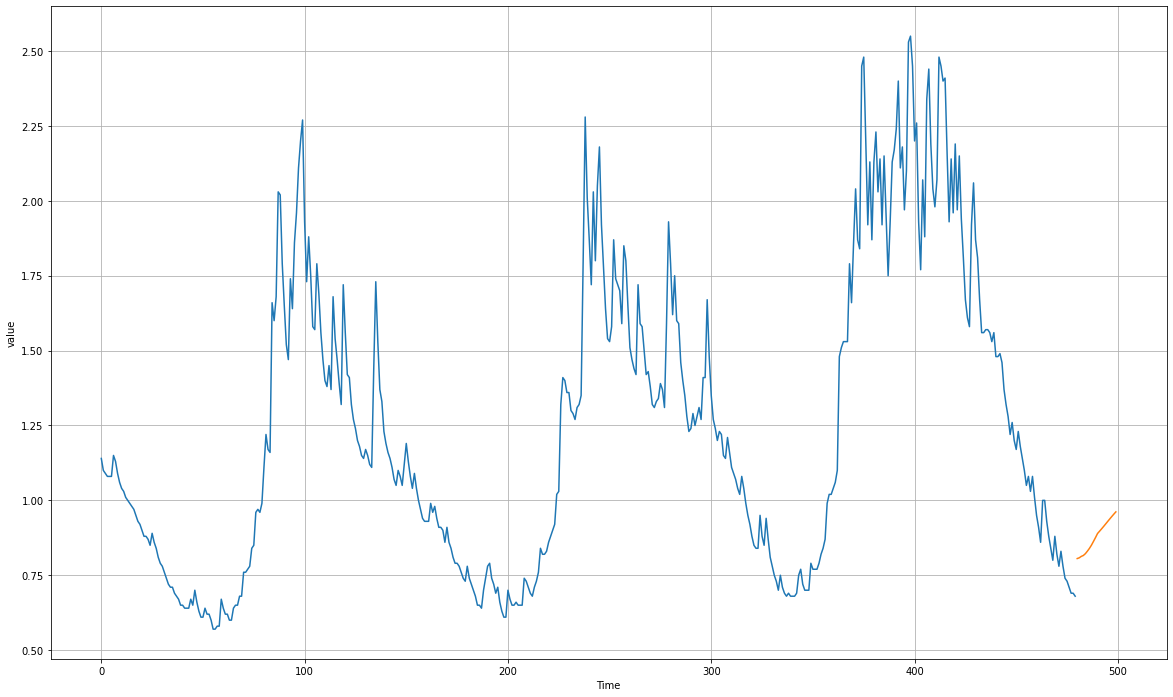

In [65]:


expanded_time = np.arange(480 + forecast_length)


plt.figure(figsize=(20, 12))
plot_series(time, series)
plot_series(expanded_time[-20:], result[-20:])